This is not an assignment. But if you want to implement sorting algorithms yourself, the following code will help you for checking their performances.

We acknowledge the data by the Taiwan Highway System (TDCS).
Reference: http://tisvcloud.freeway.gov.tw/
See http://tisvcloud.freeway.gov.tw/TISVCloud_web.files/TDCS_M06A.htm for row descriptions.

In the practice, we will use the up to first 100,000 records out of over 200,000 records.

If using more results, you will find:
* O(n^2) algorithms will be much too slow
* For over 100,000 records, recursion can fail because of a overflow of recursion depth

I didn't try to optimize the algorithms. I guess you can provide faster versions.

In [7]:
import time
import timeit
import pandas as pd
import matplotlib.pyplot as plt

traffic_data = pd.read_csv("data\TDCS_M06A_20190830_080000.csv", header=None)

def check_sort_result(func, data):
    start = time.time()
    data_copy = data[:] # important -- copy the list, instead of copy the reference.
    result = func(data_copy)
    time_used = time.time() - start
    for i in range(len(result)-1):
        if result[i] > result[i+1]:
            print("Check failed: func(data) is not sorted properly.")
            return
    print("The method {0} returned successfully for data size {1} with {2} seconds.".format(func.__name__.center(15), len(result), time_used))

def check_performance(func, data, size_samples = [10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000]):
    timing_array = []
    for size in size_samples:
        n_repeated = size_samples[-1] // size
        start = time.time()
        for run in range(n_repeated):
            data_truncated = data[:size]
            func(data_truncated)
        timing_array.append((time.time() - start) / n_repeated)
    ref_linear = [i * timing_array[0] / size_samples[0] for i in size_samples]
    ref_quadratic = [i**2 * timing_array[0] / size_samples[0]**2 for i in size_samples]
    plt.loglog(size_samples, ref_linear, size_samples, ref_quadratic, size_samples, timing_array)
    plt.show()
    
traffic_data.head()

,0,1,2,3,4,5,6,7
0,31,2019-08-30 08:17:14,03F3307N,2019-08-30 08:17:14,03F3307N,5.2,Y,2019-08-30 08:17:14+03F3307N
1,31,2019-08-30 08:01:02,03F0648S,2019-08-30 08:01:02,03F0648S,5.6,Y,2019-08-30 08:01:02+03F0648S
2,31,2019-08-30 08:51:45,03F0648N,2019-08-30 08:57:09,03F0559N,13.9,Y,2019-08-30 08:51:45+03F0648N; 2019-08-30 08:57...
3,31,2019-08-30 08:20:45,03F3854S,2019-08-30 08:20:45,03F3854S,8.6,Y,2019-08-30 08:20:45+03F3854S
4,32,2019-08-30 08:06:10,03F4168S,2019-08-30 08:09:33,03F4232S,9.3,Y,2019-08-30 08:06:10+03F4168S; 2019-08-30 08:09...


In [8]:
distances = [row[5] for row in traffic_data.values.tolist()][:10000]

# If not sorted, check_sort_result will return an error.
check_sort_result(lambda x: x, distances)

import merge_sort
check_sort_result(merge_sort.merge_sort, distances)

import quicksort
check_sort_result(quicksort.quicksort, distances)

import heap
check_sort_result(heap.heap_sort, distances)

import binary_search_tree
check_sort_result(binary_search_tree.BST_sort, distances)

import AVL_tree
check_sort_result(AVL_tree.AVL_sort, distances)

import bubble_sort
check_sort_result(bubble_sort.bubble_sort_1, distances)
check_sort_result(bubble_sort.bubble_sort_2, distances)

import insertion_sort
check_sort_result(insertion_sort.insertion_sort, distances)

Check failed: func(data) is not sorted properly.
The method    merge_sort   returned successfully for data size 10000 with 0.04398798942565918 seconds.
The method    quicksort    returned successfully for data size 10000 with 0.03697776794433594 seconds.
The method    heap_sort    returned successfully for data size 10000 with 0.1169281005859375 seconds.
The method     BST_sort    returned successfully for data size 10000 with 0.3228135108947754 seconds.
The method     AVL_sort    returned successfully for data size 10000 with 1.1369690895080566 seconds.
The method  bubble_sort_1  returned successfully for data size 10000 with 7.9679856300354 seconds.
The method  bubble_sort_2  returned successfully for data size 10000 with 12.263864517211914 seconds.
The method  insertion_sort returned successfully for data size 10000 with 5.9096293449401855 seconds.


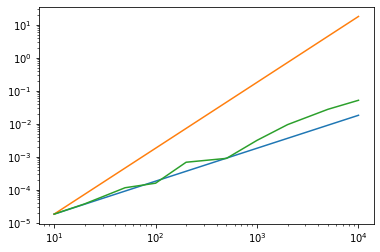

In [9]:
check_performance(merge_sort.merge_sort, distances)

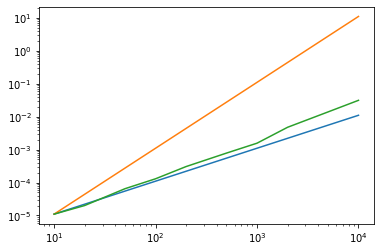

In [10]:
check_performance(quicksort.quicksort, distances)

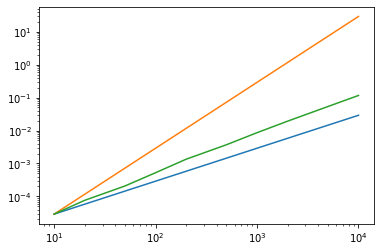

In [14]:
check_performance(heap.heap_sort, distances)

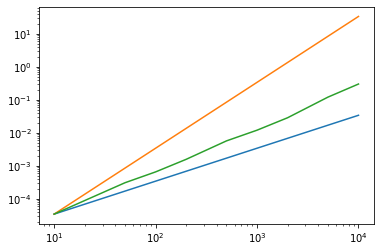

In [15]:
check_performance(binary_search_tree.BST_sort, distances)

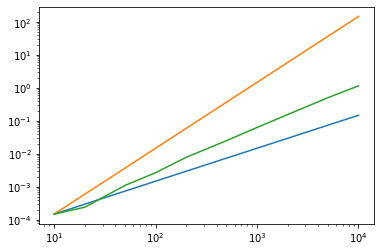

In [16]:
check_performance(AVL_tree.AVL_sort, distances)

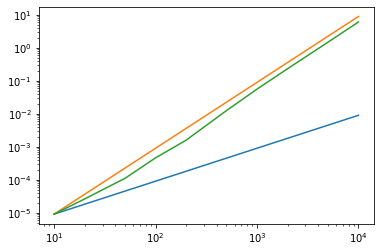

In [11]:
check_performance(insertion_sort.insertion_sort, distances)

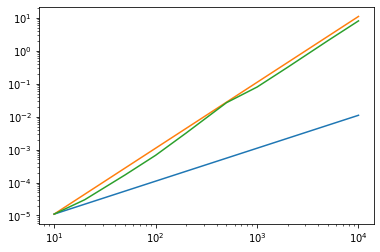

In [12]:
check_performance(bubble_sort.bubble_sort_1, distances)

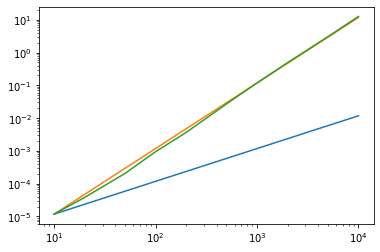

In [13]:
check_performance(bubble_sort.bubble_sort_2, distances)